<a href="https://colab.research.google.com/github/saahilahujaa/Ted-Talk-Prediction/blob/main/Ted_Talk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TED TALKS Views Prediction**
****
TED is devoted to spreading powerful ideas on just about any topic. Founded in 1984 by Richard Salman as a nonprofit organization
that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all
walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000
talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,
Jimmy Wales, Shahrukh Khan, and Bill Gates.

##**Objective**
****
The main objective is to build a predictive model, which could help in predicting the views of
the videos uploaded on the TEDx website.

##**Importing Neccessary Libraries**

In [1]:
# Importing Neccessary Packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')


##**Data Gathering and Discovery**
***

In [2]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# The variable Data_path contains the path of dataset stored in drive.
Data_path = "/content/drive/MyDrive/Alma Better/Capstone Projects/Capstone Project 2 - Ted Talk Views Prediction/"

# Importing TED Talks Data File.
Ted_talks = pd.read_csv(Data_path + "data_ted_talks.csv")

In [4]:
Ted_talks.head(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


In [5]:
Ted_talks.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,3922.0


In [6]:
Ted_talks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [7]:
Ted_talks.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

##**EDA on TED Talks Dataset**

**Views** :-

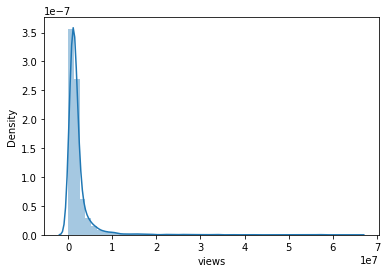

In [8]:
sns.distplot(Ted_talks["views"])

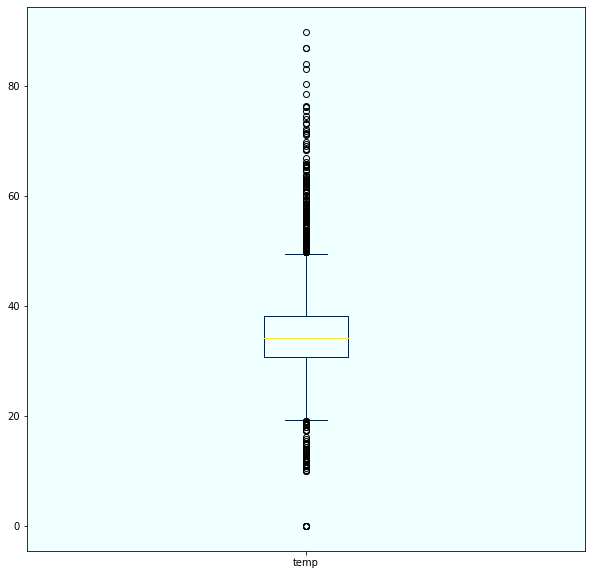

In [9]:
# Making a temporary column with Fourth root of 'views' column such that we can visualize it using a box plot.
Ted_talks["temp"] = np.power(Ted_talks["views"], 1/4)

# Plotting the Box plot on "temp" column.
Ted_talks.plot(y = "temp", kind = "box", figsize = (10,10), colormap = "cividis").patch.set_facecolor('#f0ffff')

# Dropping the 'temp' column since its irrelevant 
Ted_talks.drop(axis = 1, labels = ["temp"], inplace = True)

In [10]:
Ted_talks.drop(Ted_talks[Ted_talks['views'] <= 1000].index, inplace = True)

In [11]:
Ted_talks["all_speakers"].fillna(value = str({0:""}), axis = 0, inplace=True)

Dropping Rows with 0 Views

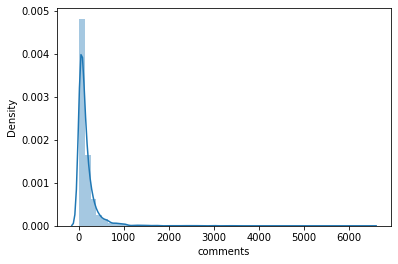

In [12]:
sns.distplot(Ted_talks["comments"])

In [24]:
li = Ted_talks[Ted_talks["comments"]>1000].index
Ted_talks.drop(labels = li, axis = 0, inplace = True)

In [25]:
Ted_talks["comments"].fillna(Ted_talks["comments"].median(), axis = 0, inplace = True)

In [26]:
Ted_talks.drop(Ted_talks[Ted_talks['views'] <= 1000].index, inplace = True)

##**Feature Engineering**
***

In [ ]:
Ted_talks.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."


In [ ]:
Ted_talks["all_speakers_count"] = Ted_talks["all_speakers"].apply(lambda x: len(eval(x)))

In [ ]:
from datetime import datetime
import datetime as dt
Ted_talks['published_date'] = Ted_talks['published_date'].apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%d"))

Ted_talks['year'] = Ted_talks['published_date'].dt.year
Ted_talks['month'] = Ted_talks['published_date'].dt.month
Ted_talks['day'] = Ted_talks["published_date"].dt.day_name()

daydict = {'Sunday' : 0, 'Monday' : 1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
Ted_talks['daynum'] = Ted_talks['day'].map(daydict)

Ted_talks['weekdays_weekend']=Ted_talks['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
Ted_talks=Ted_talks.drop(columns=['published_date'],axis=1)

In [ ]:
Ted_talks["year_recency"] = 2021 - Ted_talks["year"]
Ted_talks["per_annum_views"] = Ted_talks["views"]//Ted_talks["year_recency"]

In [ ]:
list(Ted_talks.columns)

['talk_id',
 'title',
 'speaker_1',
 'all_speakers',
 'occupations',
 'about_speakers',
 'views',
 'recorded_date',
 'event',
 'native_lang',
 'available_lang',
 'comments',
 'duration',
 'topics',
 'related_talks',
 'url',
 'description',
 'transcript',
 'all_speakers_count',
 'year',
 'month',
 'day',
 'daynum',
 'weekdays_weekend',
 'year_recency',
 'per_annum_views']

In [ ]:
Ted_talks.head(10)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,event,native_lang,...,description,transcript,all_speakers_count,year,month,day,daynum,weekdays_weekend,year_recency,per_annum_views
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,TED2006,en,...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",1,2006,6,Tuesday,2,0,15,234892
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,TED2006,en,...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",1,2006,6,Tuesday,2,0,15,966779
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,TED2006,en,...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",1,2006,6,Tuesday,2,0,15,128055
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,TED2006,en,...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,1,2006,6,Tuesday,2,0,15,177604
5,49,Behind the design of Seattle's library,Joshua Prince-Ramus,{0: 'Joshua Prince-Ramus'},{0: ['architect']},{0: 'Joshua Prince-Ramus is best known as arch...,1208138,2006-02-23,TED2006,en,...,Architect Joshua Prince-Ramus takes the audien...,I'm going to present three projects in rapid f...,1,2006,7,Monday,1,0,15,80542
6,86,Letting go of God,Julia Sweeney,{0: 'Julia Sweeney'},"{0: ['actor', 'comedian', 'playwright']}",{0: 'Julia Sweeney creates comedic works that ...,4636596,2006-02-24,TED2006,en,...,When two young Mormon missionaries knock on Ju...,"On September 10, the morning of my seventh bir...",1,2006,7,Monday,1,0,15,309106
7,94,Let's teach religion -- all religion -- in sch...,Dan Dennett,{0: 'Dan Dennett'},"{0: ['philosopher', 'cognitive scientist']}",{0: 'Dan Dennett thinks that human consciousne...,3781244,2006-02-02,TED2006,en,...,Philosopher Dan Dennett calls for religion -- ...,It's wonderful to be back. I love this wonderf...,1,2006,7,Tuesday,2,0,15,252082
8,71,A life of purpose,Rick Warren,{0: 'Rick Warren'},"{0: ['pastor', 'author']}",{0: 'Pastor Rick Warren is the author of <em>T...,3998282,2006-02-25,TED2006,en,...,"Pastor Rick Warren, author of ""The Purpose-Dri...","I'm often asked, ""What surprised you about the...",1,2006,7,Tuesday,2,0,15,266552
9,55,My wish: A global day of film,Jehane Noujaim,{0: 'Jehane Noujaim'},{0: ['filmmaker']},{0: 'TED Prize winner Jehane Noujaim is a guts...,460994,2006-02-26,TED2006,en,...,Jehane Noujaim unveils her 2006 TED Prize wish...,I can't help but this wish: to think about whe...,1,2006,7,Tuesday,2,0,15,30732
10,58,My wish: Help me stop pandemics,Larry Brilliant,{0: 'Larry Brilliant'},"{0: ['epidemiologist', 'philanthropist']}","{0: ""TED Prize winner Larry Brilliant has spen...",1265297,2006-02-23,TED2006,en,...,"Accepting the 2006 TED Prize, Dr. Larry Brilli...",I'm the luckiest guy in the world. I got to se...,1,2006,7,Tuesday,2,0,15,84353


In [ ]:
Ted_talks["native_lang"] = Ted_talks["native_lang"].apply(lambda x: 0 if x == "en" else 1)

In [ ]:
Ted_talks["available_lang_count"] = Ted_talks["available_lang"].apply(lambda x: len(eval(x)))

In [ ]:
Ted_talks["topics_covered"] = Ted_talks["topics"].apply(lambda x: len(eval(x)))

In [ ]:
d = {}
for row in Ted_talks.index:
    list_of_topics = Ted_talks["topics"][row]
    list_of_topics = list_of_topics.strip('][').split(', ')
    
    for topic in list_of_topics:
        topic = topic[1:len(topic)-1]
        d[topic] = d.get(topic, 0) + 1

In [ ]:
def weight_of_topic(x):
    x = eval(x)
    for i in range(len(x)):
        x[i] = d[str(x[i])]
    weight = sum(x)
    return weight

Ted_talks["topics_weight"] = Ted_talks["topics"].apply(lambda x: weight_of_topic(x))
    

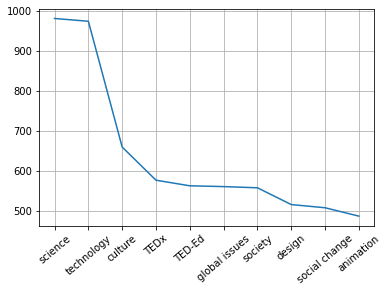

In [ ]:

from operator import itemgetter
  
ddd = dict(sorted(d.items(), key = itemgetter(1), reverse = True)[:10])

myList = ddd.items()
# myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.xticks(rotation = 40)
plt.grid()
plt.show()

In [ ]:
Ted_talks['words_count_descp'] = Ted_talks['description'].str.split().apply(len)

In [ ]:
Ted_talks.drop(axis = 1, labels = ["talk_id", "all_speakers", "title", "occupations", 
                                    "recorded_date", "about_speakers", 
                                   "related_talks", "url", 
                                   "transcript", "speaker_1", "event",  "available_lang",
                                  "topics", "description", "day", "month", "year"], inplace = True)

In [ ]:
Ted_talks.columns

Index(['views', 'native_lang', 'comments', 'duration', 'all_speakers_count',
       'daynum', 'weekdays_weekend', 'year_recency', 'per_annum_views',
       'available_lang_count', 'topics_covered', 'topics_weight',
       'words_count_descp'],
      dtype='object')

In [ ]:
Ted_talks.words_count_descp

0       39
1       26
2       31
3       31
5       32
        ..
3999    81
4000    97
4001    77
4002    75
4003    72
Name: words_count_descp, Length: 3957, dtype: int64

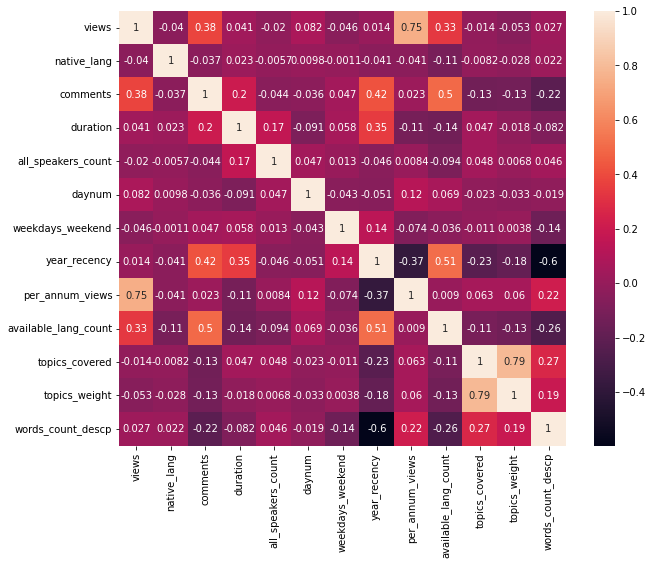

In [ ]:
correlmap = Ted_talks.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlmap, annot=True, ax = ax)

In [ ]:
Ted_talks

,views,native_lang,comments,duration,all_speakers_count,daynum,weekdays_weekend,year_recency,per_annum_views,available_lang_count,topics_covered,topics_weight,words_count_descp
0,3523392,0,272.0,977,1,2,0,15,234892,43,9,3796,39
1,14501685,0,628.0,1190,1,2,0,15,966779,49,11,1840,26
2,1920832,0,124.0,1286,1,2,0,15,128055,26,9,1993,31
3,2664069,0,219.0,1116,1,2,0,15,177604,35,9,1611,31
5,1208138,0,48.0,1198,1,1,0,15,80542,19,5,1558,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,760969,0,37.0,941,2,5,0,1,760969,4,8,1930,81
4000,502934,0,6.0,690,1,1,0,1,502934,1,7,2173,97
4001,307187,0,88.0,346,1,1,0,1,307187,4,8,2356,77
4002,464414,0,9.0,774,1,2,0,1,464414,1,5,1325,75


**Experimenting with different regression.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')


In [ ]:
dependent_variable = 'views'

In [ ]:
independent_variables = list(set(Ted_talks.columns.tolist()) - {"per_annum_views","views"})

In [ ]:
independent_variables

['available_lang_count',
 'topics_covered',
 'comments',
 'native_lang',
 'all_speakers_count',
 'duration',
 'year_recency',
 'words_count_descp',
 'topics_weight',
 'daynum',
 'weekdays_weekend']

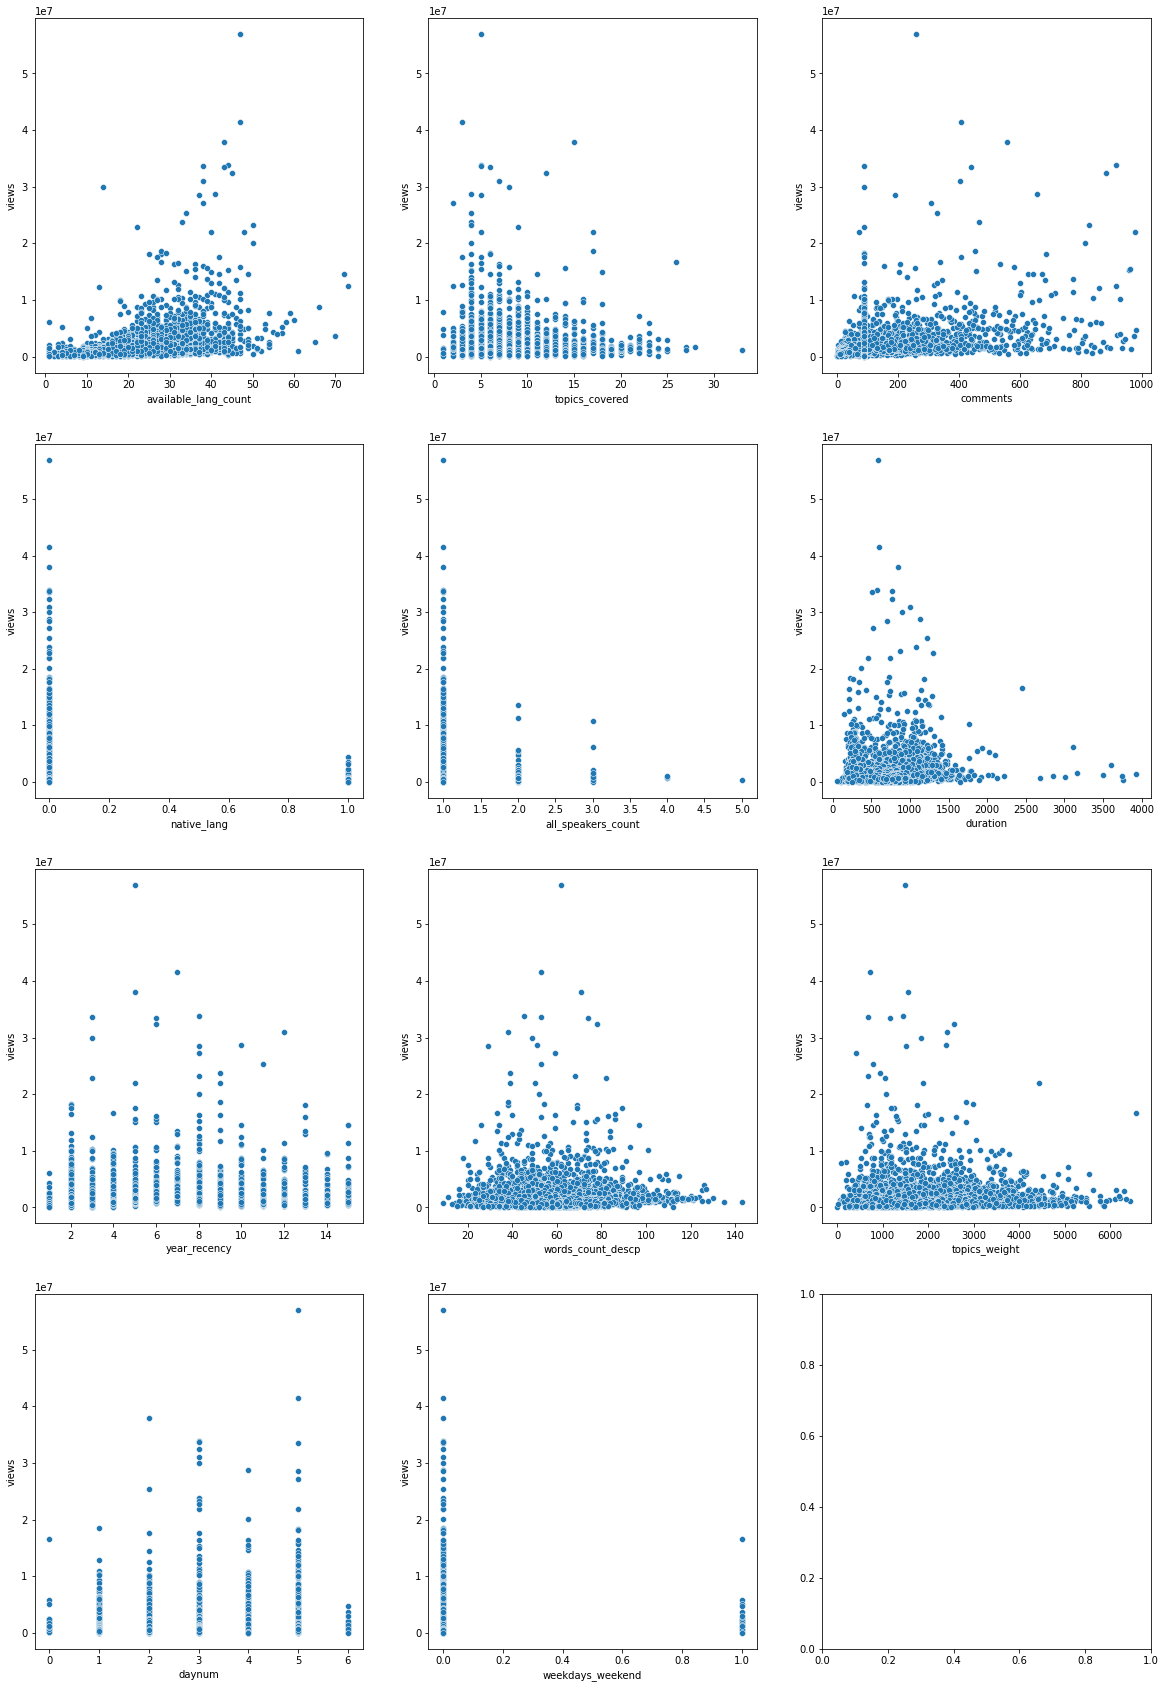

In [ ]:
variable_df = Ted_talks[independent_variables]
fig, axes = plt.subplots(nrows = (variable_df.shape[1])//3 + (variable_df.shape[1]%4 != 0)*1, ncols=3, figsize= (20,30))
for i, col in enumerate(variable_df.columns):
  sns.scatterplot(data=Ted_talks, x=col, y="views", ax = axes[i//3, i%3])

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
# Create the data of independent variables
X = Ted_talks[independent_variables].values

# Create the dependent variable data
y = Ted_talks[dependent_variable].values

In [ ]:
#check the score
reg.score(X_train, y_train)

0.24773028512460582

In [ ]:
#check the coefficeint
reg.coef_

array([ 1.24728691e+05, -1.50239912e+04,  5.69291958e+03, -3.58807973e+05,
       -2.72802237e+05,  1.39777248e+03, -2.77976037e+05, -1.04744550e+03,
       -5.77624346e+01,  1.30206254e+05,  5.73985712e+04])

In [ ]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 6024162468867.501
RMSE : 2454416.930529021
MAE : 1212806.9534300636
R2 : 0.24773028512460582
Adjusted R2 : 0.23926917381210133


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear regression,1212806.953,6.024162e+12,2454416.931,0.248,0.24


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 6672046975080.07
RMSE : 2583030.579586713
MAE : 1180900.2101175105
R2 : 0.256185366894333
Adjusted R2 : 0.24781935363854335


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

In [ ]:
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear regression,1180900.21,6.672047e+12,2583030.58,0.256,0.25


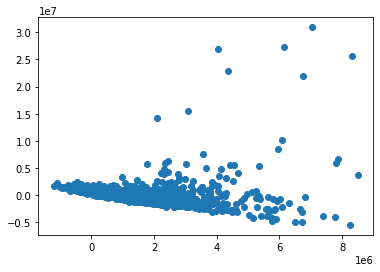

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

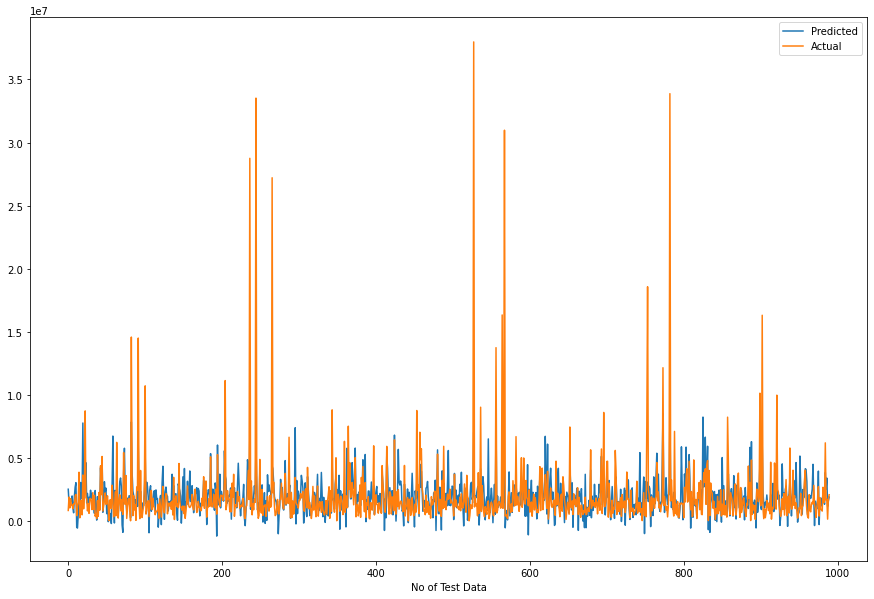

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

Lasso regression

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.2561856010599568 0.24773028510480133


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 6024162469026.095
RMSE : 2454416.930561329
MAE : 1212806.3398100126
R2 : 0.24773028510480133
Adjusted R2 : 0.23926917379207413


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df = training_df.append(dict1,ignore_index=True)

In [ ]:
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,1212806.953,6.024162e+12,2454416.931,0.248,0.24
1,Lasso regression,1212806.340,6.024162e+12,2454416.931,0.248,0.24


In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 6672044874605.07
RMSE : 2583030.172995482
MAE : 1180899.2443071231
R2 : 0.2561856010599568
Adjusted R2 : 0.24781959043793178


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,1180900.210,6.672047e+12,2583030.580,0.256,0.25
1,Lasso regression,1180899.244,6.672045e+12,2583030.173,0.256,0.25


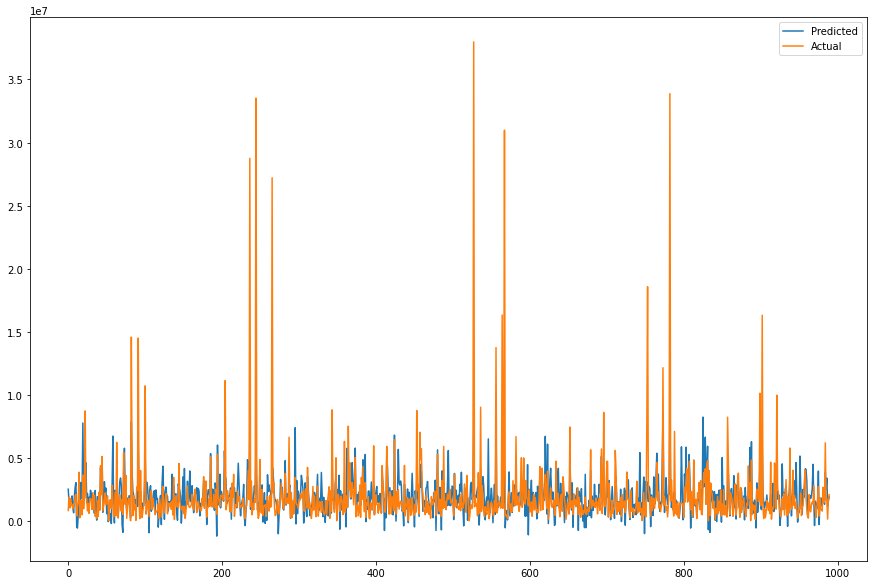

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

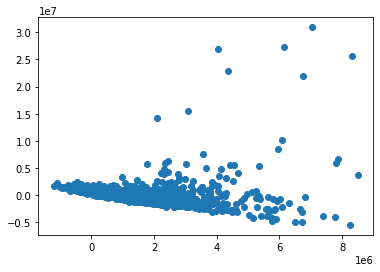

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

Ridge Regression

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [ ]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(X_train, y_train)

0.24773028319409363

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 6024162484327.008
RMSE : 2454416.933678345
MAE : 1212802.9548451642
R2 : 0.24773028319409363
Adjusted R2 : 0.23926917185987584


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 6672031848859.975
RMSE : 2583027.651586404
MAE : 1180893.0492687053
R2 : 0.2561870531989848
Adjusted R2 : 0.24782105890981188


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

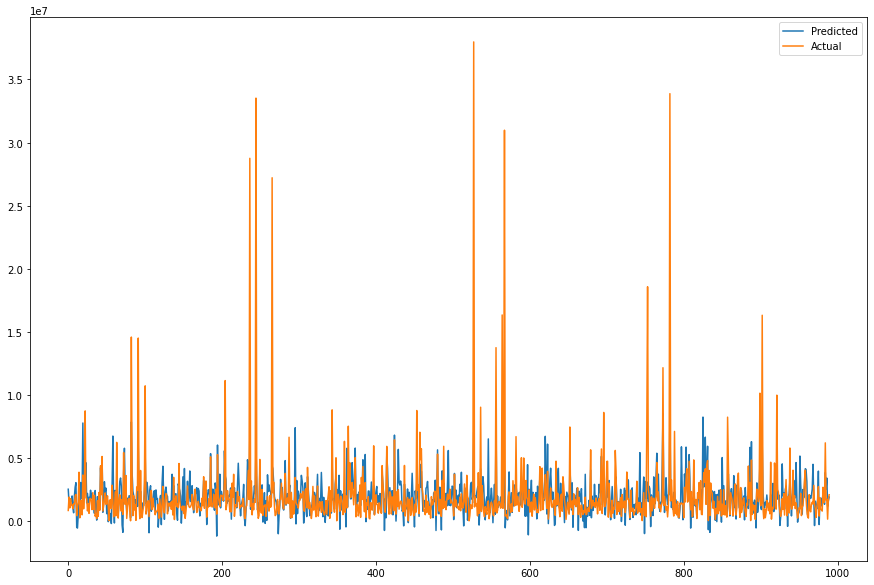

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

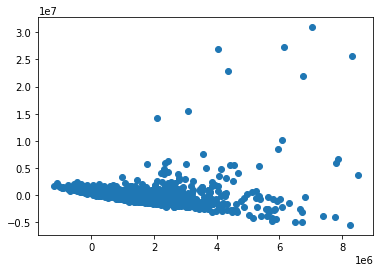

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

Elastic Net Regression

In [ ]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#check the score
elasticnet.score(X_train, y_train)

0.24748249180446358

In [ ]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 6026146793358.7295
RMSE : 2454821.132660938
MAE : 1211108.3487995875
R2 : 0.24748249180446358
Adjusted R2 : 0.239018593450526


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 6667953963948.084
RMSE : 2582238.16948555
MAE : 1177369.020562328
R2 : 0.2566416648767673
Adjusted R2 : 0.24828078380687413


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

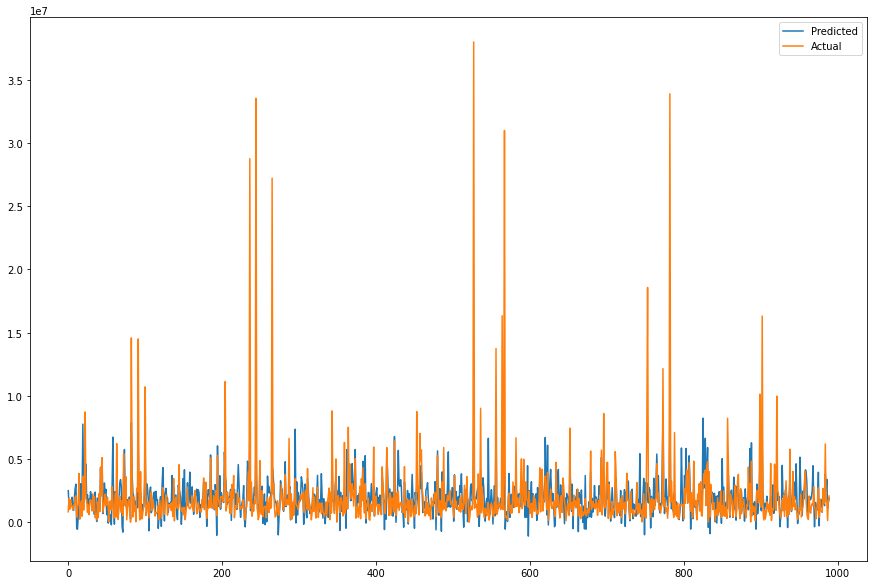

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

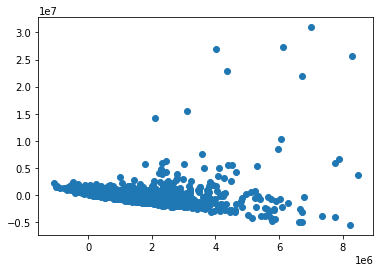

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

In [ ]:
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,1180900.210,6.672047e+12,2583030.580,0.256,0.25
1,Lasso regression,1180899.244,6.672045e+12,2583030.173,0.256,0.25
2,Ridge regression,1180893.049,6.672032e+12,2583027.652,0.256,0.25
3,Elastic net regression Test,1177369.021,6.667954e+12,2582238.169,0.257,0.25


In [ ]:
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,1212806.953,6.024162e+12,2454416.931,0.248,0.24
1,Lasso regression,1212806.340,6.024162e+12,2454416.931,0.248,0.24
2,Ridge regression,1212802.955,6.024162e+12,2454416.934,0.248,0.24
3,Elastic net regression,1211108.349,6.026147e+12,2454821.133,0.247,0.24
